In [1]:
# Impoting Packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Data Overview

In [2]:
data=pd.read_csv(r"heart disease.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [3]:
# More about data
print("Rows & columns:" , data.shape[0], "&", data.shape[1])
print("Column names:" , [names for names in data.columns])

Rows & columns: 253680 & 22
Column names: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# EDA Multivariate Analysis

## Correlation Coefficient

<AxesSubplot:>

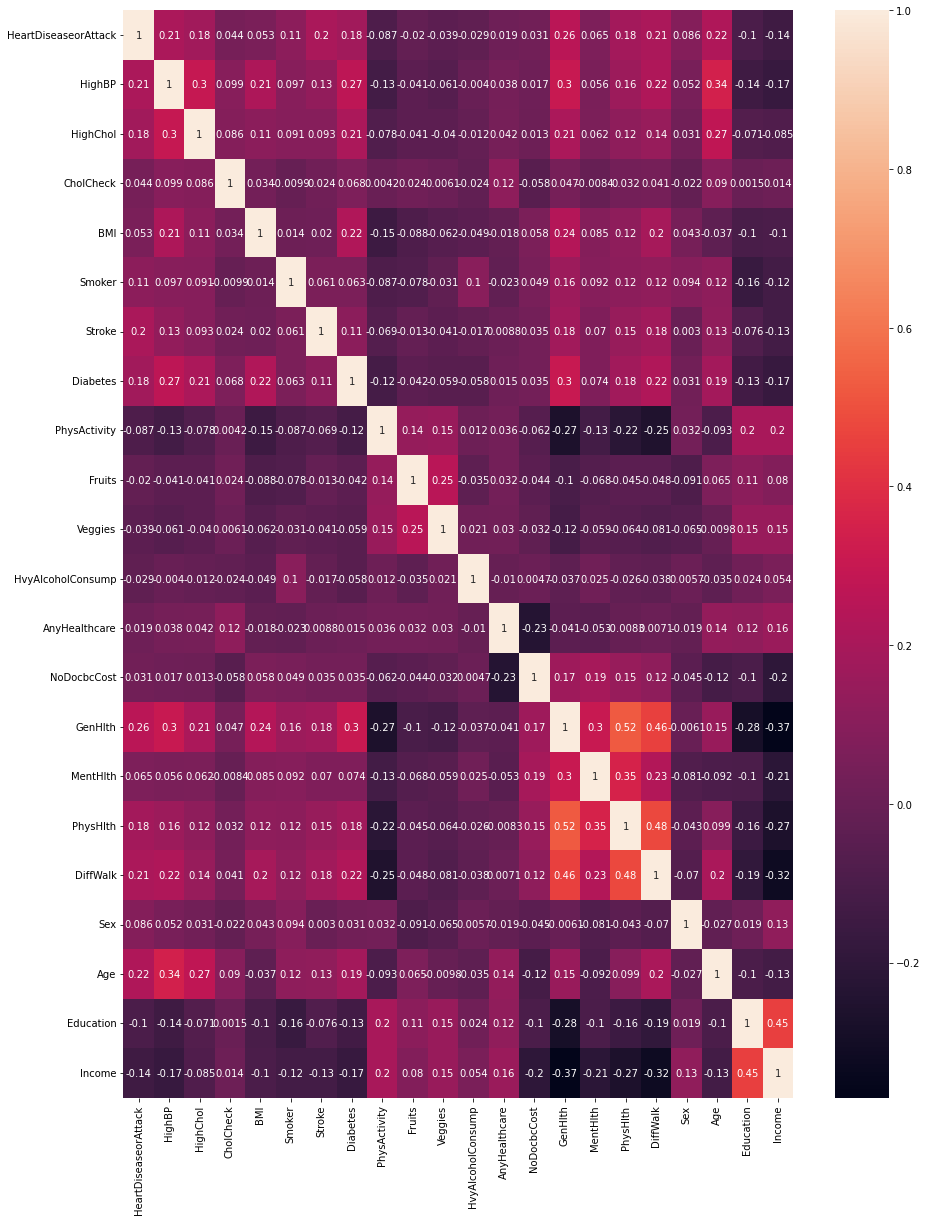

In [7]:
cor=data.corr()
plt.figure(figsize=(15,20))
sns.heatmap(cor,annot=True)

# Positively Correlated Features -
### 1. Stroke & Diabetes  
### 2. HighBP & HighChol  
### 3. PhysHlth &  GenHlth    
### 4. DiffWalk & GenHlth  
### 5. Income   & Education    

# Neagtively Correlated Features -
#### 1. GenHlth & PhysActivity    
#### 2. Income & GenHlth
### 3. Income & DiffWalk  
### 4. AnyHealthcare   & NoDocbcCost 

#### how many people are having high blood pressure?

In [8]:
df=data.loc[data["HighBP"]==1,["Sex",'Age',"HighBP"]]
df

,Sex,Age,HighBP
0,0,9,1
2,0,9,1
3,0,11,1
4,0,11,1
5,1,10,1
...,...,...,...
253673,1,3,1
253675,1,5,1
253676,0,11,1
253678,1,7,1


In [9]:
df.value_counts()

Sex  Age  HighBP
0    10   1         9609
1    10   1         8643
0    9    1         8478
1    9    1         8040
0    11   1         7969
     13   1         7065
     8    1         6843
1    11   1         6608
     8    1         6406
0    12   1         6193
     7    1         4750
1    7    1         4709
     12   1         4239
     13   1         4223
     6    1         2975
0    6    1         2760
1    5    1         1974
0    5    1         1767
1    4    1         1471
0    4    1         1098
1    3    1          965
0    3    1          671
1    2    1          585
     1    1          338
0    2    1          296
     1    1          154
dtype: int64

#### how many people are having high cholesterol?

In [10]:
df1=data.loc[data["HighChol"]==1,["Sex","HighChol"]]
df1

,Sex,HighChol
0,0,1
2,0,1
4,0,1
5,1,1
7,0,1
...,...,...
253670,0,1
253671,1,1
253675,1,1
253676,0,1


In [11]:
df1.value_counts()

Sex  HighChol
0    1           58272
1    1           49319
dtype: int64

#### how many people are having BMI is underwight?

In [12]:
df2=data.loc[(data["BMI"]<=18),['Sex','Age',"BMI"]]
df2

,Sex,Age,BMI
159,0,8,18
168,0,8,18
213,0,4,18
214,0,8,18
221,0,8,17
...,...,...,...
253595,0,1,18
253619,0,3,18
253662,0,5,16
253665,0,5,17


In [13]:
df2.count()

Sex    3127
Age    3127
BMI    3127
dtype: int64

#### how many people are having BMI is normal.?

In [14]:
df3=data.loc[(data["BMI"]>=18)&(data["BMI"]<=24),['Sex','Age',"BMI"]]
df3

,Sex,Age,BMI
4,0,11,24
9,1,8,24
16,0,10,21
17,1,7,23
18,0,2,23
...,...,...,...
253663,0,5,23
253666,0,6,23
253671,1,8,23
253676,0,11,18


In [15]:
df3.count()

Sex    70756
Age    70756
BMI    70756
dtype: int64

#### how many people are having BMI is overwight?

In [16]:
df4=data.loc[(data["BMI"]>=25)&(data["BMI"]<=29),['Sex','Age',"BMI"]]
df4

,Sex,Age,BMI
1,0,7,25
2,0,9,28
3,0,11,27
5,1,10,25
7,0,11,25
...,...,...,...
253669,1,6,27
253670,0,13,25
253674,0,3,27
253677,0,2,28


In [17]:
df4.count()

Sex    93749
Age    93749
BMI    93749
dtype: int64

#### how many people are having BMI is obese?

In [18]:
df5=data.loc[(data["BMI"]>=30)&(data["BMI"]<=35),['Sex','Age',"BMI"]]
df5

,Sex,Age,BMI
6,0,9,30
8,0,9,30
11,0,10,34
14,0,4,33
15,0,6,33
...,...,...,...
253646,0,2,35
253653,1,10,33
253660,0,7,34
253661,0,6,33


In [19]:
df5.count()

Sex    59026
Age    59026
BMI    59026
dtype: int64

#### how many people doing exercise and they are smoker?

In [20]:
df6=data.loc[(data['Smoker']==1) & (data['PhysActivity']==1),["PhysActivity","Smoker"]]
df6

,PhysActivity,Smoker
1,1,1
5,1,1
7,1,1
10,1,1
14,1,1
...,...,...
253619,1,1
253631,1,1
253634,1,1
253654,1,1


In [21]:
df6.value_counts()

PhysActivity  Smoker
1             1         80326
dtype: int64

#### how many people doing exercise  they are no smoker & eat fruits

In [22]:
df7=data.loc[(data['Smoker']==0) & (data['PhysActivity']==1)&(data["Fruits"]==1),["PhysActivity","Smoker","Fruits"]]
df7

,PhysActivity,Smoker,Fruits
3,1,0,1
4,1,0,1
16,1,0,1
23,1,0,1
25,1,0,1
...,...,...,...
253655,1,0,1
253656,1,0,1
253673,1,0,1
253677,1,0,1


In [23]:
df7.count()

PhysActivity    77992
Smoker          77992
Fruits          77992
dtype: int64

In [24]:
catcol = [ 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

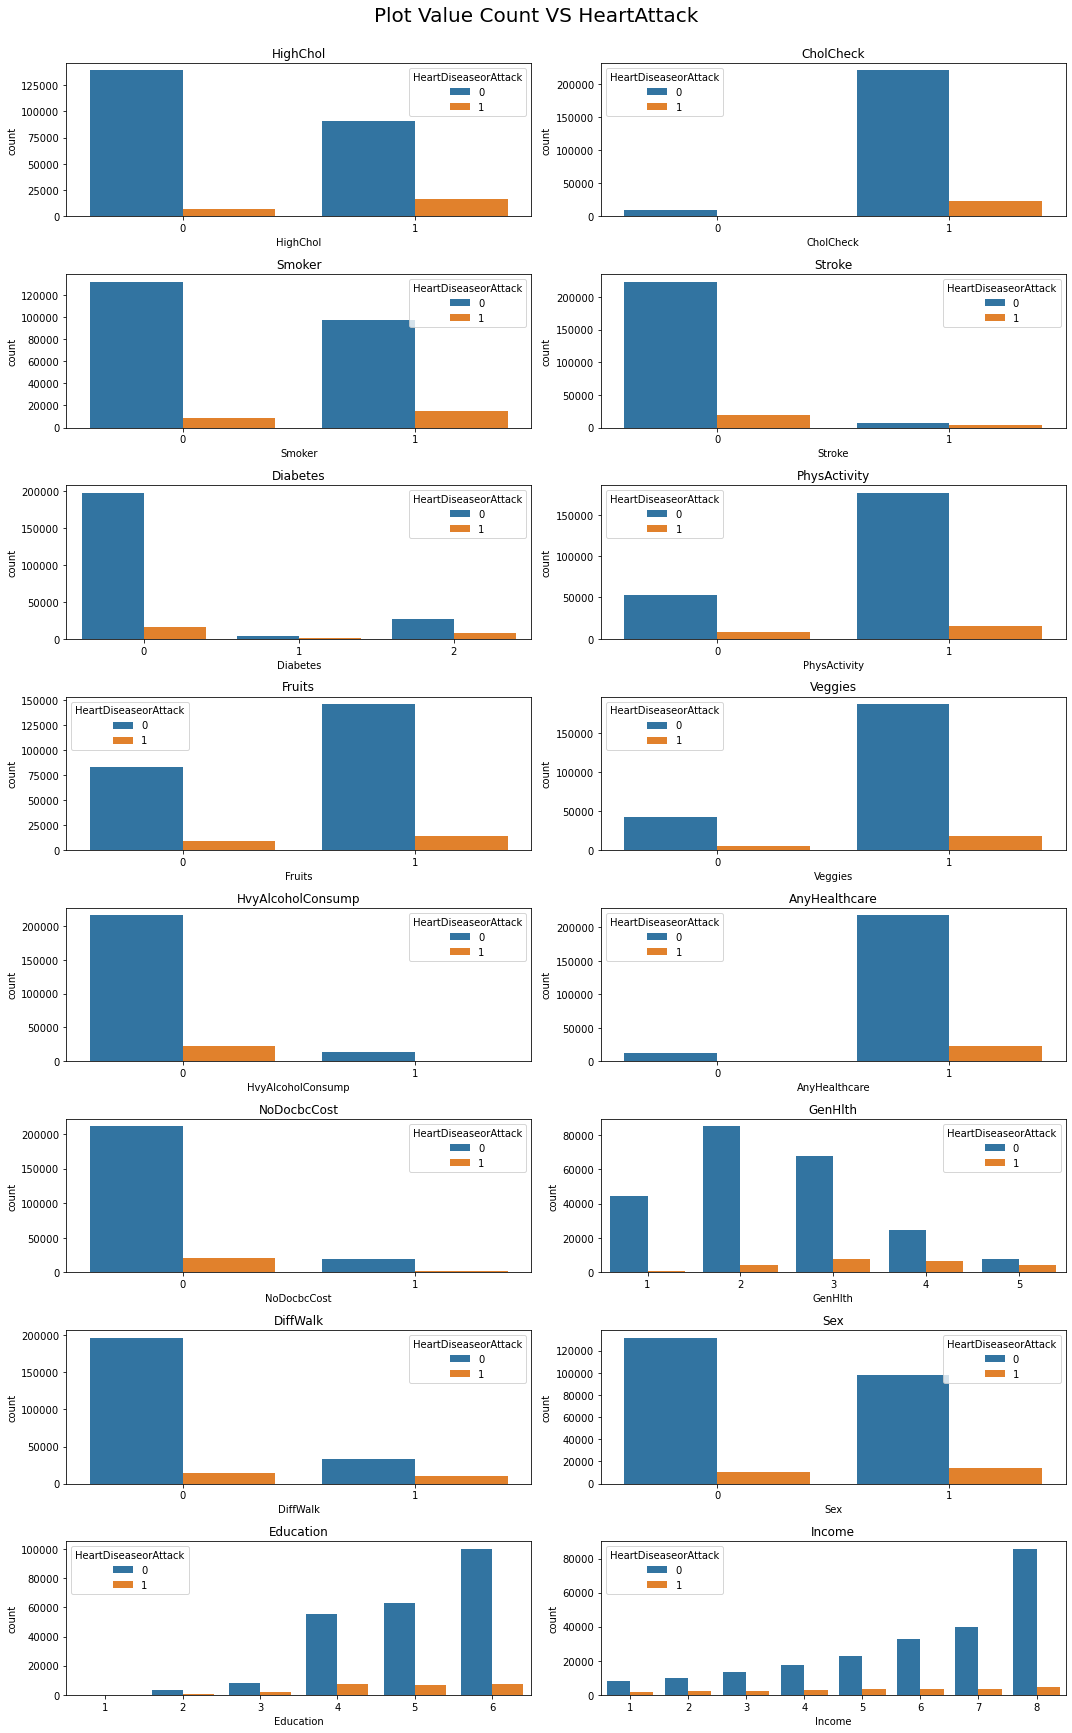

In [25]:
plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [26]:
bincol = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

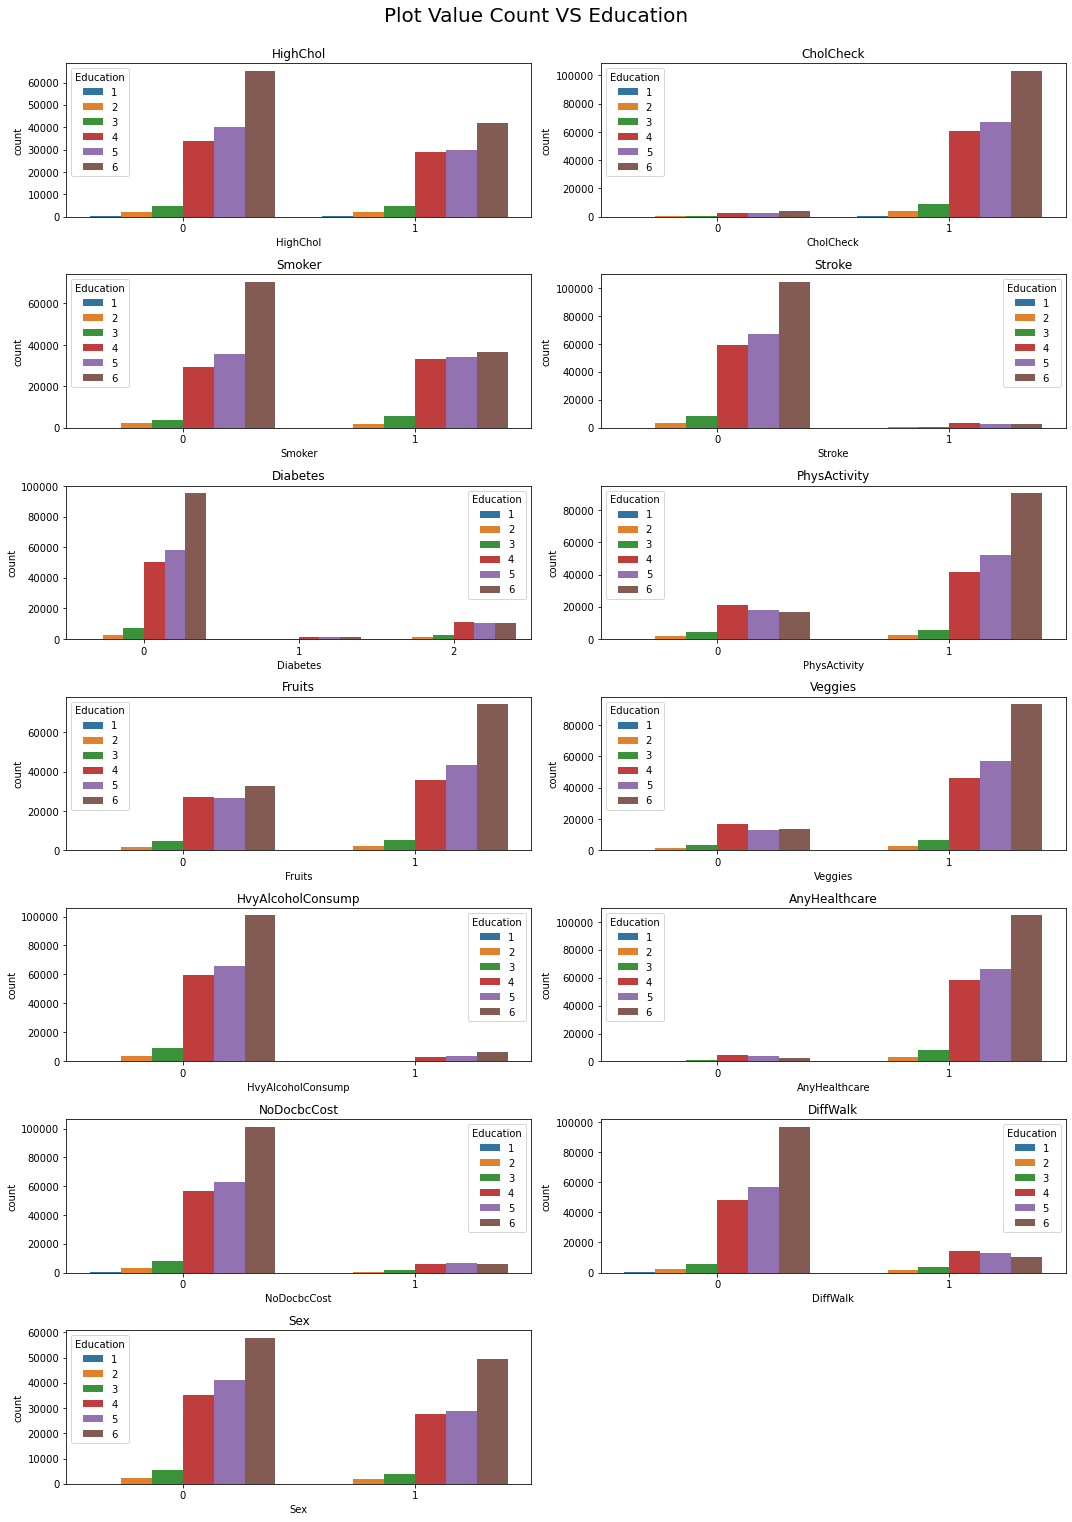

In [27]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bincol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='Education')
    plt.title(f"{column}")
    plt.tight_layout()

# Feature Engineering

In [28]:
for feature in ['BMI', 'MentHlth', 'PhysHlth']: 
    data[feature] = data[feature].astype('int64')
    data[feature] = MinMaxScaler(feature_range=(0, 1)).fit_transform(data[[feature]])

#  Imbalanced data

In [29]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [30]:
data['HeartDiseaseorAttack'].value_counts()

0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

In [31]:
r1=RandomOverSampler()
x_data,y_data=r1.fit_resample(x,y)

In [32]:
x_data.shape

(459574, 21)

In [33]:
y_data.shape

(459574,)

# Cross validation

In [34]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [35]:
for train_data,test_data in kf.split(x):
    print("Train : ",train_data," Test: ",test_data)
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    print("Train : ",train_data.shape," Test: ",test_data.shape)
    

Train :  [126840 126841 126842 ... 253677 253678 253679]  Test:  [     0      1      2 ... 126837 126838 126839]
Train :  (126840,)  Test:  (126840,)
Train :  [     0      1      2 ... 126837 126838 126839]  Test:  [126840 126841 126842 ... 253677 253678 253679]
Train :  (126840,)  Test:  (126840,)


# Model Fitting

In [36]:
algorithm = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
    ]

In [37]:
# Split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=27)

In [38]:
# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(x_data, y_data)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
print("=" * 30)
    

LogisticRegression
****Results****
Accuracy: 76.8982%
Log Loss: 7.9791731107869746


KNeighborsClassifier
****Results****
Accuracy: 93.1611%
Log Loss: 2.3621318446654467


RandomForestClassifier
****Results****
Accuracy: 99.4756%
Log Loss: 0.1811241478895471


DecisionTreeClassifier
****Results****
Accuracy: 99.4810%
Log Loss: 0.17924525239306516


